# Acidentes

**Importação de bibliotecas**

In [ ]:
#1 - IMPORTANDO BIBLIOTECAS 

import pandas as pd


In [ ]:
#2 - INTEGRANDO COM A GCP

from google.colab import auth
auth.authenticate_user()
project_id = 'projeto-final-grupo03'
!gcloud config set project projeto-final-grupo03

Updated property [core/project].


In [ ]:
#3 - IMPORTAÇÃO DO ARQUIVO DA GCP PARA O COLAB

!gsutil cp gs://datasets_gp03/acidentes_2019.csv /tmp/acidentes_2019.csv
!gsutil cp gs://datasets_gp03/acidentes_2020.csv /tmp/acidentes_2020.csv

#Print do resultado para garantir que a transferencia funcionou.
#!cat /tmp/acidentes_2019.csv
#!cat /tmp/acidentes_2020.csv

Copying gs://datasets_gp03/acidentes_2019.csv...
- [1 files][ 56.4 MiB/ 56.4 MiB]                                                
Operation completed over 1 objects/56.4 MiB.                                     
Copying gs://datasets_gp03/acidentes_2020.csv...
- [1 files][ 50.3 MiB/ 50.3 MiB]                                                
Operation completed over 1 objects/50.3 MiB.                                     


**Extração dos dados**




In [ ]:
#3 - IMPORTAR DATASET ACIDENTES 2019
df1 = pd.read_csv('/tmp/acidentes_2019.csv', sep=';', parse_dates=['data_inversa'], dayfirst=True)

In [ ]:
#3 - IMPORTAR DATASET ACIDENTES 2020
df2 = pd.read_csv('/tmp/acidentes_2020.csv', sep=';', parse_dates=['data_inversa'], dayfirst=True)

In [ ]:
#4 - LISTA COM OS DATAFRAMES
frames = [df1, df2]

In [ ]:
#5 - CONCATENANDO DATAFRAMES
df = pd.concat(frames)
df

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182256.0,403856.0,2019-01-01,terça-feira,04:00:00,CE,116.0,"136,9",RUSSAS,Animais na Pista,Atropelamento de Animal,Sem Vítimas,Amanhecer,Decrescente,Vento,Simples,Curva,Não,324937,Caminhão,I/MB 15SPRINT RONTAN AMB,2012.0,Condutor,Ileso,35.0,Masculino,1,0,0,0,"-4,766018","-38,056034",SR-CE,DEL16/3,UOP01/CE
1,182263.0,402859.0,2019-01-01,terça-feira,05:00:00,MT,158.0,"599,5",AGUA BOA,Defeito Mecânico no Veículo,Incêndio,Sem Vítimas,Amanhecer,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,324940,Caminhão,FORD/CARGO 815 N,2011.0,Condutor,Ileso,30.0,Masculino,1,0,0,0,"-14,319","-52,169",SR-MT,DEL2/8,UOP02/MT
2,182277.0,402850.0,2019-01-01,terça-feira,10:00:00,PA,10.0,34,DOM ELISEU,Velocidade Incompatível,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Nublado,Simples,Não Informado,Não,324958,Caminhão-trator,VOLVO/FH 540 6X4T,2012.0,Condutor,Ileso,54.0,Masculino,1,0,0,0,"-4,15296734","-47,54608154",SR-PA,DEL19/2,UOP03/PA
3,182289.0,402431.0,2019-01-01,terça-feira,08:30:00,BA,101.0,13,RIO REAL,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Desvio Temporário,Não,324987,Caminhão-trator,SCANIA/R 440 A6X2,2018.0,Condutor,Ileso,43.0,Masculino,1,0,0,0,"-11,5896","-37,8761",SR-SE,DEL20/2,UOP03/SE
4,182307.0,402642.0,2019-01-01,terça-feira,13:50:00,BA,116.0,440,FEIRA DE SANTANA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Curva,Não,325030,Caminhão-trator,VOLVO/FH12 380 4X2T,2003.0,Passageiro,Lesões Graves,37.0,Masculino,0,0,1,0,"-12,344","-39,087",SR-BA,DEL10/2,UOP01/BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147637,352311.0,784912.0,2020-08-15,sábado,18:30:00,RS,116.0,"156,6",CAXIAS DO SUL,Desobediência às normas de trânsito pelo condutor,Colisão lateral,Com Vítimas Feridas,Anoitecer,Decrescente,Céu Claro,Simples,Curva,Não,633801,Automóvel,FORD/KA FLEX,2012.0,Condutor,Ileso,58.0,Masculino,1,0,0,0,"-29,20731013","-51,17757864",SR-RS,UOP01,DEL05
147638,352395.0,785081.0,2020-12-30,quarta,11:00:00,PI,343.0,20,PARNAIBA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,633956,Automóvel,I/VW SPACEFOX COMFORT,2008.0,Condutor,Lesões Leves,19.0,Masculino,0,1,0,0,"-2,981128","-41,762501",SR-PI,UOP01,DEL05
147639,352395.0,785080.0,2020-12-30,quarta,11:00:00,PI,343.0,20,PARNAIBA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,633955,Automóvel,VW/GOL 1.0,2011.0,Condutor,Ileso,30.0,Masculino,1,0,0,0,"-2,981128","-41,762501",SR-PI,UOP01,DEL05
147640,352488.0,785255.0,2020-12-31,quinta,08:00:00,MA,135.0,95,ITAPECURU MIRIM,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Simples,Interseção de vias,Não,634129,Caminhonete,FIAT/STRADA WORKING CE,2013.0,Condutor,Não Informado,NaN,Não Informado,0,0,0,0,"-3,3279719","-44,44236412",SR-MA,UOP02,DEL01


**Inconsistências, limpeza e tratamento de dados**

In [ ]:
#6 - DROPANDO COLUNAS DESNECESSÁRIAS AO ESTUDO

## dff -> data frame final
dff = df.drop(['km', 'municipio', 'tipo_acidente', 'fase_dia', 'sentido_via', 'tipo_pista', 'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop' ], axis=1)

In [ ]:
#7 - RENOMEAR COLUNAS

dff.rename(columns={'id':'id_acidente', 'pesid': 'id_pessoa', 'data_inversa': 'data', 'br': 'rodovia_br'}, inplace=True)

In [ ]:
#8 - VERIFICANDO DROP E RENAME

dff

,id_acidente,id_pessoa,data,dia_semana,horario,uf,rodovia_br,causa_acidente,classificacao_acidente,condicao_metereologica,tipo_envolvido,estado_fisico,idade,sexo
0,182256.0,403856.0,2019-01-01,terça-feira,04:00:00,CE,116.0,Animais na Pista,Sem Vítimas,Vento,Condutor,Ileso,35.0,Masculino
1,182263.0,402859.0,2019-01-01,terça-feira,05:00:00,MT,158.0,Defeito Mecânico no Veículo,Sem Vítimas,Garoa/Chuvisco,Condutor,Ileso,30.0,Masculino
2,182277.0,402850.0,2019-01-01,terça-feira,10:00:00,PA,10.0,Velocidade Incompatível,Sem Vítimas,Nublado,Condutor,Ileso,54.0,Masculino
3,182289.0,402431.0,2019-01-01,terça-feira,08:30:00,BA,101.0,Ingestão de Álcool,Com Vítimas Feridas,Céu Claro,Condutor,Ileso,43.0,Masculino
4,182307.0,402642.0,2019-01-01,terça-feira,13:50:00,BA,116.0,Ingestão de Álcool,Com Vítimas Feridas,Céu Claro,Passageiro,Lesões Graves,37.0,Masculino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147637,352311.0,784912.0,2020-08-15,sábado,18:30:00,RS,116.0,Desobediência às normas de trânsito pelo condutor,Com Vítimas Feridas,Céu Claro,Condutor,Ileso,58.0,Masculino
147638,352395.0,785081.0,2020-12-30,quarta,11:00:00,PI,343.0,Falta de Atenção à Condução,Com Vítimas Feridas,Céu Claro,Condutor,Lesões Leves,19.0,Masculino
147639,352395.0,785080.0,2020-12-30,quarta,11:00:00,PI,343.0,Falta de Atenção à Condução,Com Vítimas Feridas,Céu Claro,Condutor,Ileso,30.0,Masculino
147640,352488.0,785255.0,2020-12-31,quinta,08:00:00,MA,135.0,Falta de Atenção à Condução,Com Vítimas Feridas,Céu Claro,Condutor,Não Informado,NaN,Não Informado


In [ ]:
#9 - ANALISANDO TIPO E NULOS

dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309915 entries, 0 to 147641
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id_acidente             309915 non-null  float64       
 1   id_pessoa               309913 non-null  float64       
 2   data                    309915 non-null  datetime64[ns]
 3   dia_semana              309915 non-null  object        
 4   horario                 309915 non-null  object        
 5   uf                      309915 non-null  object        
 6   rodovia_br              309283 non-null  float64       
 7   causa_acidente          309915 non-null  object        
 8   classificacao_acidente  309915 non-null  object        
 9   condicao_metereologica  309915 non-null  object        
 10  tipo_envolvido          309915 non-null  object        
 11  estado_fisico           309915 non-null  object        
 12  idade                   279372

In [ ]:
#10 - SOMA DE VALORES NULOS PARA SABER A SIGNIFICÂNCIA EM EXCLUIR NULOS

dff.isnull().sum()

id_acidente                   0
id_pessoa                     2
data                          0
dia_semana                    0
horario                       0
uf                            0
rodovia_br                  632
causa_acidente                0
classificacao_acidente        0
condicao_metereologica        0
tipo_envolvido                0
estado_fisico                 0
idade                     30543
sexo                          0
dtype: int64

In [ ]:
#11 - DROP LINHAS DUPLICADAS

dff.drop_duplicates()

,id_acidente,id_pessoa,data,dia_semana,horario,uf,rodovia_br,causa_acidente,classificacao_acidente,condicao_metereologica,tipo_envolvido,estado_fisico,idade,sexo
0,182256.0,403856.0,2019-01-01,terça-feira,04:00:00,CE,116.0,Animais na Pista,Sem Vítimas,Vento,Condutor,Ileso,35.0,Masculino
1,182263.0,402859.0,2019-01-01,terça-feira,05:00:00,MT,158.0,Defeito Mecânico no Veículo,Sem Vítimas,Garoa/Chuvisco,Condutor,Ileso,30.0,Masculino
2,182277.0,402850.0,2019-01-01,terça-feira,10:00:00,PA,10.0,Velocidade Incompatível,Sem Vítimas,Nublado,Condutor,Ileso,54.0,Masculino
3,182289.0,402431.0,2019-01-01,terça-feira,08:30:00,BA,101.0,Ingestão de Álcool,Com Vítimas Feridas,Céu Claro,Condutor,Ileso,43.0,Masculino
4,182307.0,402642.0,2019-01-01,terça-feira,13:50:00,BA,116.0,Ingestão de Álcool,Com Vítimas Feridas,Céu Claro,Passageiro,Lesões Graves,37.0,Masculino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147637,352311.0,784912.0,2020-08-15,sábado,18:30:00,RS,116.0,Desobediência às normas de trânsito pelo condutor,Com Vítimas Feridas,Céu Claro,Condutor,Ileso,58.0,Masculino
147638,352395.0,785081.0,2020-12-30,quarta,11:00:00,PI,343.0,Falta de Atenção à Condução,Com Vítimas Feridas,Céu Claro,Condutor,Lesões Leves,19.0,Masculino
147639,352395.0,785080.0,2020-12-30,quarta,11:00:00,PI,343.0,Falta de Atenção à Condução,Com Vítimas Feridas,Céu Claro,Condutor,Ileso,30.0,Masculino
147640,352488.0,785255.0,2020-12-31,quinta,08:00:00,MA,135.0,Falta de Atenção à Condução,Com Vítimas Feridas,Céu Claro,Condutor,Não Informado,NaN,Não Informado


In [ ]:
#12 - DROP NULOS EM 'id_pessoa' E 'rodovia_br' POR REPRESENTAREM MENOS DE 0.2% DO DF

#dff[dff['id_pessoa'].isnull()]
#dff[dff['rodovia_br'].isnull()]

dff.dropna(subset=['id_pessoa'], inplace=True)
dff.dropna(subset=['rodovia_br'], inplace=True)


In [ ]:
#13 - VERIFICANDO DROP DE NULOS E DUPLIACATAS 

dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309281 entries, 0 to 147641
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id_acidente             309281 non-null  float64       
 1   id_pessoa               309281 non-null  float64       
 2   data                    309281 non-null  datetime64[ns]
 3   dia_semana              309281 non-null  object        
 4   horario                 309281 non-null  object        
 5   uf                      309281 non-null  object        
 6   rodovia_br              309281 non-null  float64       
 7   causa_acidente          309281 non-null  object        
 8   classificacao_acidente  309281 non-null  object        
 9   condicao_metereologica  309281 non-null  object        
 10  tipo_envolvido          309281 non-null  object        
 11  estado_fisico           309281 non-null  object        
 12  idade                   278808

In [ ]:
#14 - ALTERANDO TIPO DE DADOS

dff.id_acidente = dff.id_acidente.convert_dtypes(convert_integer=True)
dff.id_pessoa = dff.id_pessoa.convert_dtypes(convert_integer=True)
dff.idade = dff.idade.convert_dtypes(convert_integer=True)
dff.rodovia_br = dff.rodovia_br.convert_dtypes(convert_integer=True)
dff.dia_semana = dff.dia_semana.convert_dtypes(convert_string=True)
dff.uf = dff.uf.convert_dtypes(convert_string=True)
dff.causa_acidente = dff.causa_acidente.convert_dtypes(convert_string=True)
dff.classificacao_acidente = dff.classificacao_acidente.convert_dtypes(convert_string=True)
dff.condicao_metereologica = dff.condicao_metereologica.convert_dtypes(convert_string=True)
dff.tipo_envolvido = dff.tipo_envolvido.convert_dtypes(convert_string=True)
dff.estado_fisico = dff.estado_fisico.convert_dtypes(convert_string=True)
dff.sexo = dff.sexo.convert_dtypes(convert_string=True)

In [ ]:
#15 - VERIFICANDO ALTERAÇÃO DO TIPO DE DADO

dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309281 entries, 0 to 147641
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id_acidente             309281 non-null  Int64         
 1   id_pessoa               309281 non-null  Int64         
 2   data                    309281 non-null  datetime64[ns]
 3   dia_semana              309281 non-null  string        
 4   horario                 309281 non-null  object        
 5   uf                      309281 non-null  string        
 6   rodovia_br              309281 non-null  Int64         
 7   causa_acidente          309281 non-null  string        
 8   classificacao_acidente  309281 non-null  string        
 9   condicao_metereologica  309281 non-null  string        
 10  tipo_envolvido          309281 non-null  string        
 11  estado_fisico           309281 non-null  string        
 12  idade                   278808

In [ ]:
#16 - ANALISANDO SE OS ESTADOS SÃO UNICOS

pd.unique(dff['uf'])

<StringArray>
['CE', 'MT', 'PA', 'BA', 'RS', 'SE', 'MG', 'PE', 'RJ', 'SP', 'RN', 'GO', 'PR',
 'MA', 'ES', 'PI', 'PB', 'SC', 'AL', 'MS', 'DF', 'RO', 'TO', 'RR', 'AM', 'AP',
 'AC']
Length: 27, dtype: string

In [ ]:
#17 - CONTANDO O NÚMERO DE ESTADOS

unicos = pd.unique(dff['uf'])
cont = 0
for i in unicos:
    cont += 1
print(cont)

27


In [ ]:
#18 - CONSULTA DIA DA SEMANA ÚNICOS

pd.unique(dff['dia_semana'])

<StringArray>
[  'terça-feira',  'quarta-feira',  'quinta-feira',   'sexta-feira',
        'sábado',       'domingo', 'segunda-feira',        'quarta',
        'quinta',         'sexta',       'segunda',         'terça']
Length: 12, dtype: string

In [ ]:
#19 - ALTERAR NOME DIA DA SEMANA

dff.loc[dff.dia_semana == 'segunda', ['dia_semana']] = 'segunda-feira'
dff.loc[dff.dia_semana == 'terça', ['dia_semana']] = 'terça-feira'
dff.loc[dff.dia_semana == 'quarta', ['dia_semana']] = 'quarta-feira'
dff.loc[dff.dia_semana == 'quinta', ['dia_semana']] = 'quinta-feira'
dff.loc[dff.dia_semana == 'sexta', ['dia_semana']] = 'sexta-feira'

In [ ]:
#20 - VERIFICANDO ALTERAÇÃO
pd.unique(dff['dia_semana'])


<StringArray>
[  'terça-feira',  'quarta-feira',  'quinta-feira',   'sexta-feira',
        'sábado',       'domingo', 'segunda-feira']
Length: 7, dtype: string

In [ ]:
#21 - EDITANDO OS DADOS DA COLUNA "causa_acidente"

dff.loc[dff.causa_acidente == 'Ingestão de álcool pelo condutor', ['causa_acidente']] = 'Ingestão de Álcool pelo Condutor'
dff.loc[dff.causa_acidente == 'Ingestão de Álcool', ['causa_acidente']] = 'Ingestão de Álcool pelo Condutor'
dff.loc[dff.causa_acidente == 'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre', ['causa_acidente']] = 'Ingestão de Álcool e/ou Substâncias Psicoativas pelo Pedestre'
dff.loc[dff.causa_acidente == 'Ingestão de álcool ou de substâncias psicoativas pelo pedestre', ['causa_acidente']] = 'Ingestão de Álcool e/ou Substâncias Psicoativas pelo Pedestre'
dff.loc[dff.causa_acidente == 'Carga excessiva e/ou mal acondicionada', ['causa_acidente']] = 'Carga Excessiva e/ou Mal Acondicionada'
dff.loc[dff.causa_acidente == 'Desobediência às normas de trânsito pelo condutor', ['causa_acidente']] = 'Desobediência às Normas de Trânsito Pelo Condutor'
dff.loc[dff.causa_acidente == 'Desobediência às normas de trânsito pelo pedestre', ['causa_acidente']] = 'Desobediência às Normas de Trânsito Pelo Pedestre'
dff.loc[dff.causa_acidente == 'Não guardar distância de segurança', ['causa_acidente']] = 'Não Guardar Distância de Segurança'
dff.loc[dff.causa_acidente == 'Objeto estático sobre o leito carroçável', ['causa_acidente']] = 'Objeto Estático Sobre o Leito Carroçável'
dff.loc[dff.causa_acidente == 'Condutor desrespeitou a iluminação vermelha do semáforo', ['causa_acidente']] = 'Condutor Desrespeitou a Iluminação Vermelha do Semáforo'
dff.loc[dff.causa_acidente == 'Sinalização da via insuficiente ou inadequada', ['causa_acidente']] = 'Sinalização da Via Insuficiente ou Inadequada'
dff.loc[dff.causa_acidente == 'Ausência de reação do condutor', ['causa_acidente']] = 'Ausência de Reação do Condutor'
dff.loc[dff.causa_acidente == 'Reação tardia ou ineficiente do condutor', ['causa_acidente']] = 'Reação Tardia ou Ineficiente do Condutor'
dff.loc[dff.causa_acidente == 'Pista esburacada', ['causa_acidente']] = 'Pista Esburacada'
dff.loc[dff.causa_acidente == 'Acumulo de areia ou detritos sobre o pavimento', ['causa_acidente']] = 'Acumulo de Areia ou Detritos Sobre o Pavimento'
dff.loc[dff.causa_acidente == 'Pedestre andava na pista', ['causa_acidente']] = 'Pedestre Andava na Pista'
dff.loc[dff.causa_acidente == 'Demais falhas mecânicas ou elétricas', ['causa_acidente']] = 'Demais Falhas Mecânicas ou Elétricas'
dff.loc[dff.causa_acidente == 'Manobra de mudança de faixa', ['causa_acidente']] = 'Manobra de Mudança de Faixa'
dff.loc[dff.causa_acidente == 'Avarias e/ou desgaste excessivo no pneu', ['causa_acidente']] = 'Avarias e/ou Desgaste Excessivo no Pneu'
dff.loc[dff.causa_acidente == 'Acumulo de óleo sobre o pavimento', ['causa_acidente']] = 'Acumulo de Óleo Sobre o Pavimento'
dff.loc[dff.causa_acidente == 'Condutor usando celular', ['causa_acidente']] = 'Condutor Usando Celular'
dff.loc[dff.causa_acidente == 'Desrespeitar a preferência no cruzamento', ['causa_acidente']] = 'Desrespeitar a Preferência no Cruzamento'
dff.loc[dff.causa_acidente == 'Transitar no acostamento', ['causa_acidente']] = 'Transitar no Acostamento'
dff.loc[dff.causa_acidente == 'Iluminação deficiente', ['causa_acidente']] = 'Iluminação Deficiente'
dff.loc[dff.causa_acidente == 'Acesso irregular', ['causa_acidente']] = 'Acesso Irregular'
dff.loc[dff.causa_acidente == 'Afundamento ou ondulação no pavimento', ['causa_acidente']] = 'Afundamento ou Ondulação no Pavimento'
dff.loc[dff.causa_acidente == 'Frear bruscamente', ['causa_acidente']] = 'Frear Bruscamente'
dff.loc[dff.causa_acidente == 'Acostamento em desnível', ['causa_acidente']] = 'Acostamento em Desnível'
dff.loc[dff.causa_acidente == 'Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo', ['causa_acidente']] = 'Deficiência ou Não Acionamento do Sistema de Iluminação/Sinalização do Veículo'
dff.loc[dff.causa_acidente == 'Transitar na contramão', ['causa_acidente']] = 'Transitar na Contramão'
dff.loc[dff.causa_acidente == 'Conversão proibida', ['causa_acidente']] = 'Conversão Proibida'
dff.loc[dff.causa_acidente == 'Acessar a via sem observar a presença dos outros veículos', ['causa_acidente']] = 'Acessar a Via sem Observar a Presença dos Outros Veículos'
dff.loc[dff.causa_acidente == 'Entrada inopinada do pedestre', ['causa_acidente']] = 'Entrada Inopinada do Pedestre'
dff.loc[dff.causa_acidente == 'Mal súbito do condutor', ['causa_acidente']] = 'Mal Súbito do Condutor'
dff.loc[dff.causa_acidente == 'Demais falhas na via', ['causa_acidente']] = 'Demais Falhas na Via'
dff.loc[dff.causa_acidente == 'Trafegar com motocicleta (ou similar) entre as faixas', ['causa_acidente']] = 'Trafegar com Motocicleta (ou Similar) Entre as Faixas'
dff.loc[dff.causa_acidente == 'Estacionar ou parar em local proibido', ['causa_acidente']] = 'Estacionar ou Parar em Local Proibido'
dff.loc[dff.causa_acidente == 'Pedestre cruzava a pista fora da faixa', ['causa_acidente']] = 'Pedestre Cruzava a Pista Fora da Faixa'
dff.loc[dff.causa_acidente == 'Condutor deixou de manter distância do veículo da frente', ['causa_acidente']] = 'Condutor Deixou de Manter Distância do Veículo da Frente'
dff.loc[dff.causa_acidente == 'Ausência de sinalização', ['causa_acidente']] = 'Ausência de Sinalização'
dff.loc[dff.causa_acidente == 'Acumulo de água sobre o pavimento', ['causa_acidente']] = 'Acumulo de Água Sobre o Pavimento'

In [ ]:
#22 - VERIFICANDO ALTERAÇÕES

dff.head(2)

,id_acidente,id_pessoa,data,dia_semana,horario,uf,rodovia_br,causa_acidente,classificacao_acidente,condicao_metereologica,tipo_envolvido,estado_fisico,idade,sexo
0,182256,403856,2019-01-01,terça-feira,04:00:00,CE,116,Animais na Pista,Sem Vítimas,Vento,Condutor,Ileso,35,Masculino
1,182263,402859,2019-01-01,terça-feira,05:00:00,MT,158,Defeito Mecânico no Veículo,Sem Vítimas,Garoa/Chuvisco,Condutor,Ileso,30,Masculino


In [ ]:
#23 - ANALISANDO COLUNA 'classificacao_acidente'

pd.unique(dff['classificacao_acidente'])

<StringArray>
['Sem Vítimas', 'Com Vítimas Feridas', 'Com Vítimas Fatais']
Length: 3, dtype: string

In [ ]:
#23 - ANALISANDO coluna 'condicao_metereologica'

pd.unique(dff['condicao_metereologica'])

<StringArray>
[           'Vento',   'Garoa/Chuvisco',          'Nublado',
        'Céu Claro',              'Sol',            'Chuva',
         'Ignorado', 'Nevoeiro/Neblina',             'Neve',
          'Granizo']
Length: 10, dtype: string

In [ ]:
#23 - ANALISANDO coluna 'tipo_envolvido'

pd.unique(dff['tipo_envolvido'])

<StringArray>
['Condutor', 'Passageiro', 'Pedestre', 'Testemunha', 'Cavaleiro']
Length: 5, dtype: string

In [ ]:
#23 - ANALISANDO COLUNA 'estado_fisico'

pd.unique(dff['estado_fisico'])

<StringArray>
['Ileso', 'Lesões Graves', 'Lesões Leves', 'Não Informado', 'Óbito']
Length: 5, dtype: string

In [ ]:
#23 - ANALISANDO COLUNA 'sexo'

pd.unique(dff['sexo'])

<StringArray>
['Masculino', 'Não Informado', 'Feminino', 'Ignorado']
Length: 4, dtype: string

In [ ]:
#24 - CONTANDO RESULTADOS 'cavaleiro' NA COLUNA 'tipo_envolvido'

cont = 0
for i in dff.tipo_envolvido:
    if i == 'Cavaleiro':
        cont += 1
print(cont)

83


In [ ]:
#25 - CONTANDO RESULTADOS 'Não Informado' NA COLUNA 'estado_fisico'

cont = 0
for i in dff.estado_fisico:
    if i == 'Não Informado':
        cont += 1
print(cont)

19228


In [ ]:
#26 - CONTANDO RESULTADOS 'Não Informado' NA COLUNA 'sexo'

cont = 0
for i in dff.sexo:
    if i == 'Não Informado':
        cont += 1
print(cont)

#Número significativo de não informado

19228


In [ ]:
#27 - CONTANDO RESULTADOS 'Ignorado' NA COLUNA 'sexo'

cont = 0
for i in dff.sexo:
    if i == 'Ignorado':
        cont += 1
print(cont)

#Número de ignorados

1809


In [ ]:
#28 - CONTANDO VALORES ÚNICOS POR COLUNA

unicos = pd.unique(dff['id_acidente'])
cont = 0
for i in unicos:
    cont += 1
print(cont)

##VALORES ABAIXO ANALISADOS

#pd.unique(dff['id_pessoa'])
#pd.unique(dff['data_inversa'])
#pd.unique(dff['dia_semana'])
#pd.unique(dff['uf'])
#pd.unique(dff['causa_acidente'])
#pd.unique(dff['sexo'])

130723


**PLOTAR GRÁFICOS PARA VISUALIZAÇÃO**

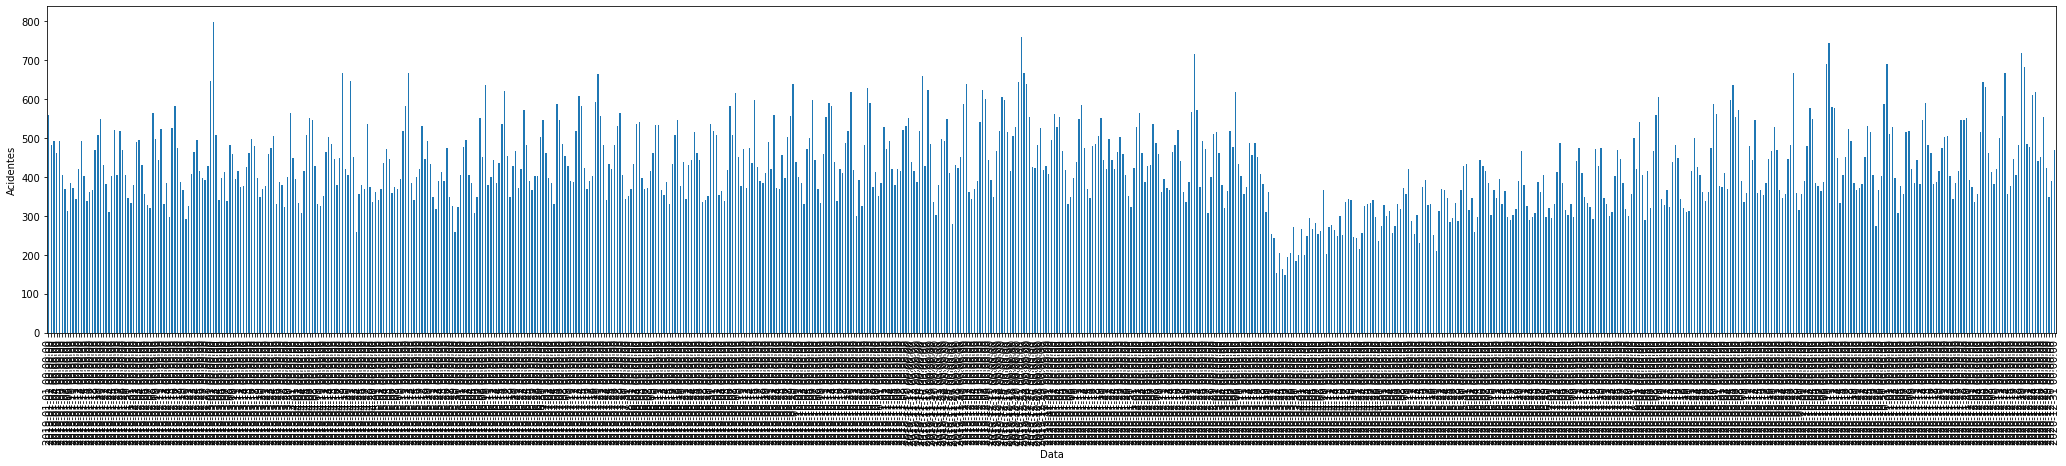

In [ ]:
#29 - PLOTANDO GRÁFICO PARA UMA BREVE VISUALIZAÇÃO

dff.groupby(['data']).id_acidente.size().plot.bar(figsize=(36,6),xlabel='Data',ylabel='Acidentes')

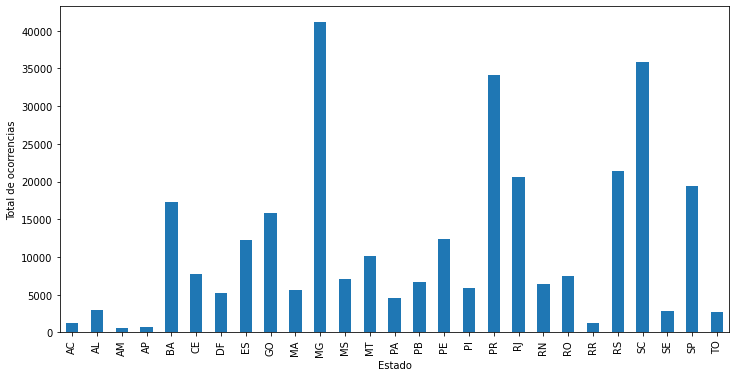

In [ ]:
#29 - PLOTANDO GRÁFICO PARA UMA BREVE VISUALIZAÇÃO 'acidentes por estado'

dff.groupby(['uf']).id_acidente.size().plot.bar(figsize=(12,6),xlabel='Estado',ylabel='Total de ocorrencias')

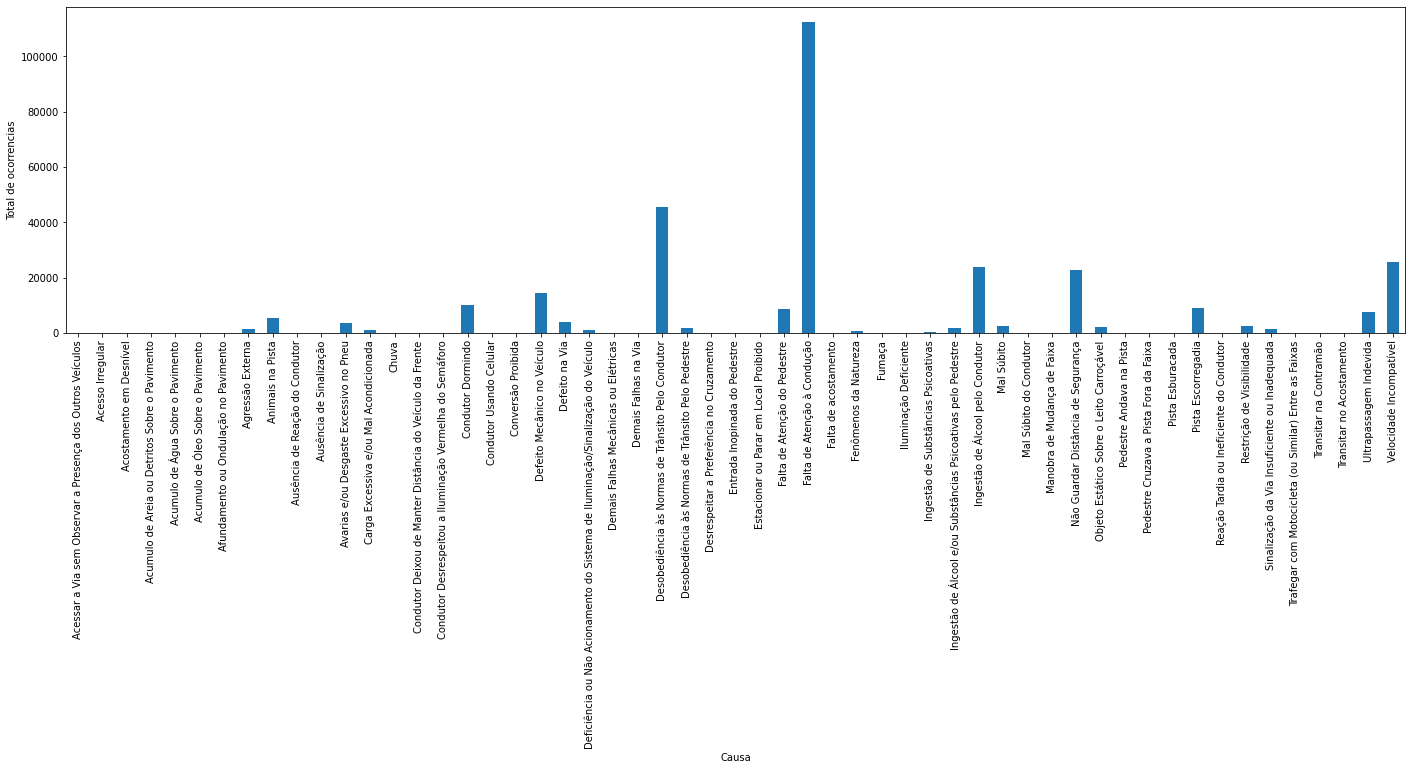

In [ ]:
#29 - PLOTANDO GRÁFICO PARA UMA BREVE VISUALIZAÇÃO 'causa acidente'

dff.groupby(['causa_acidente']).id_acidente.size().plot.bar(figsize=(24,6),xlabel='Causa',ylabel='Total de ocorrencias')

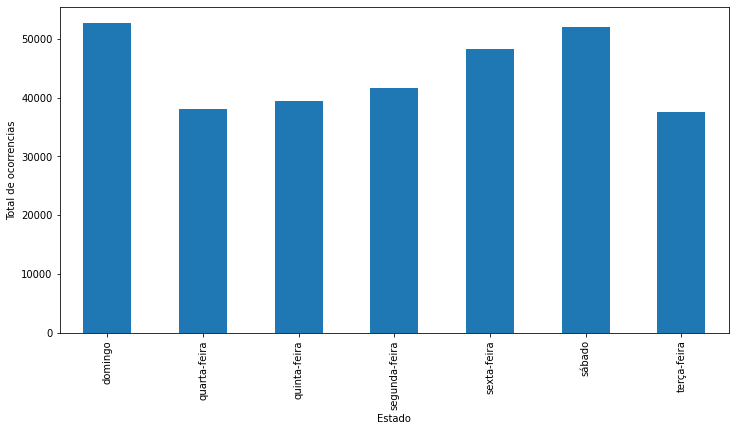

In [ ]:
#29 - PLOTANDO GRÁFICO PARA UMA BREVE VISUALIZAÇÃO 'dia da semana'

dff.groupby(['dia_semana']).id_acidente.size().plot.bar(figsize=(12,6),xlabel='Estado',ylabel='Total de ocorrencias')

**EXPORTAR PARA GCP**

In [ ]:
#30 - SALVANDO O ARQUIVO NORMALIZADO NO BUCKET

dff.to_csv('acidentes_tratado.csv')
!gsutil cp acidentes_tratado.csv gs://notebooks_pandas_gp03/
#!gsutil cat gs://notebooks_pandas_gp03/acidentes_tratado.csv

Copying file://acidentes_tratado.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/45.8 MiB.                                     
